In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original picture

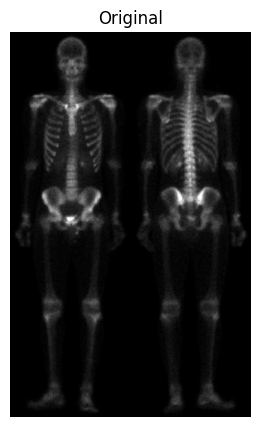

In [ ]:
img = cv2.imread("/home/santa/Desktop/lab/bodyx_ray/HW_BodyXray2.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,5))
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.show()

Laplacian filter

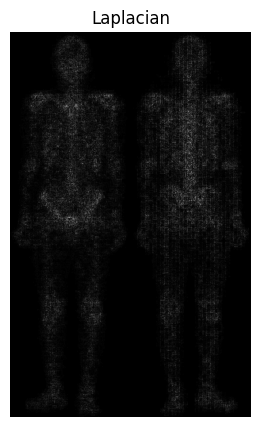

In [8]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
plt.figure(figsize=(10,5))
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian")
plt.axis("off")

plt.show()

C = a+b ; a = original picture b = Laplacian 

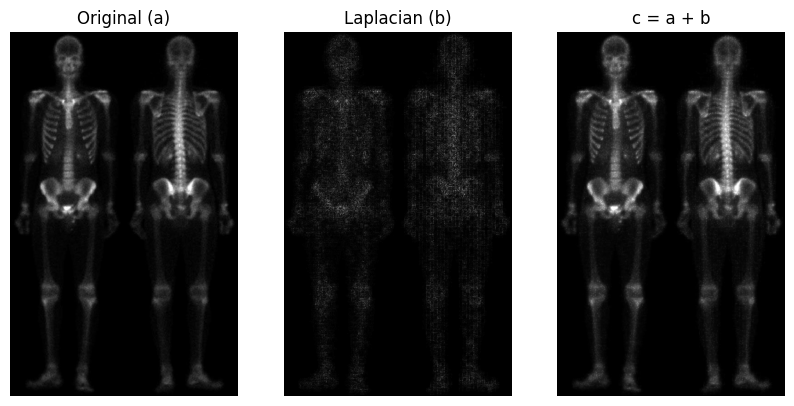

In [12]:
a = img
b = laplacian
c = cv2.add(a,b)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title("Original (a)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(b, cmap='gray')
plt.title("Laplacian (b)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(c, cmap='gray')
plt.title("c = a + b")
plt.axis("off")

plt.show()

d = Sobel of a
Sobel ที่รวม X และ Y เพื่อหาขอบในทุกทิศทาง
โดยที่สามารถปรับ ksize ได้เช่น 1 3 5 

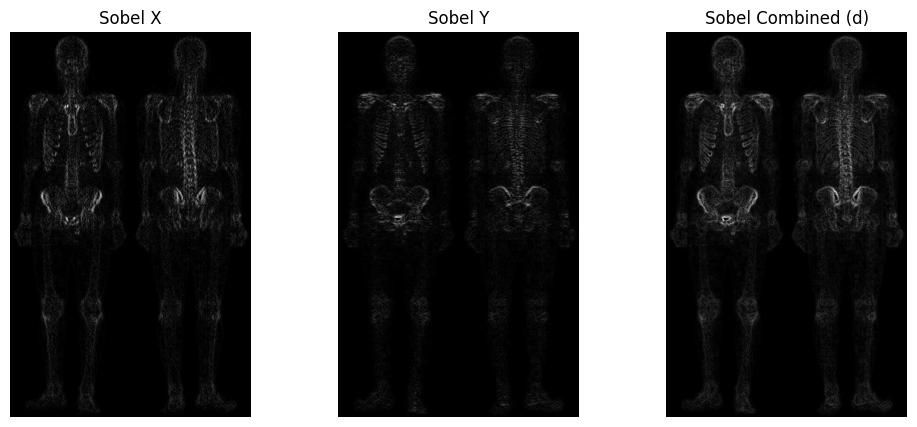

In [13]:
sobel_x = cv2.Sobel(a, cv2.CV_64F, 1, 0, ksize=1)
sobel_x = np.uint8(np.absolute(sobel_x))

sobel_y = cv2.Sobel(a, cv2.CV_64F, 0, 1, ksize=1)
sobel_y = np.uint8(np.absolute(sobel_y))

d = cv2.add(sobel_x, sobel_y)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(d, cmap='gray')
plt.title("Sobel Combined (d)")
plt.axis("off")

plt.show()

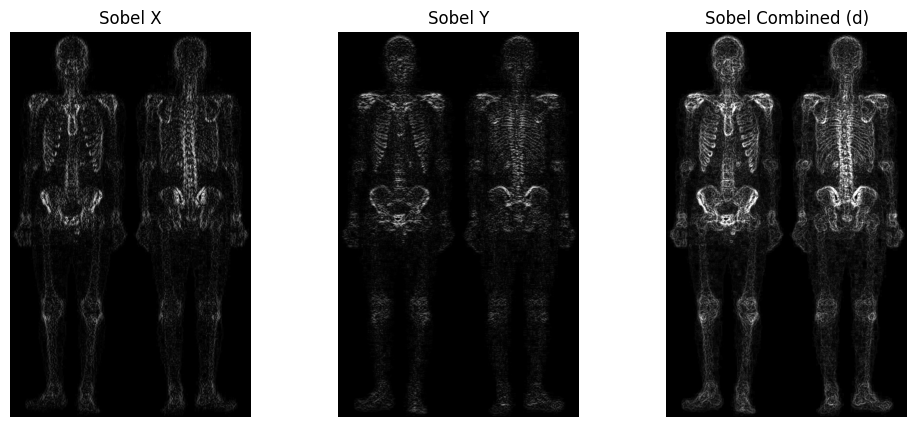

In [14]:
sobel_x = cv2.Sobel(a, cv2.CV_64F, 1, 0, ksize=3)
sobel_x = np.uint8(np.absolute(sobel_x))

sobel_y = cv2.Sobel(a, cv2.CV_64F, 0, 1, ksize=3)
sobel_y = np.uint8(np.absolute(sobel_y))

d = cv2.add(sobel_x, sobel_y)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(d, cmap='gray')
plt.title("Sobel Combined (d)")
plt.axis("off")

plt.show()

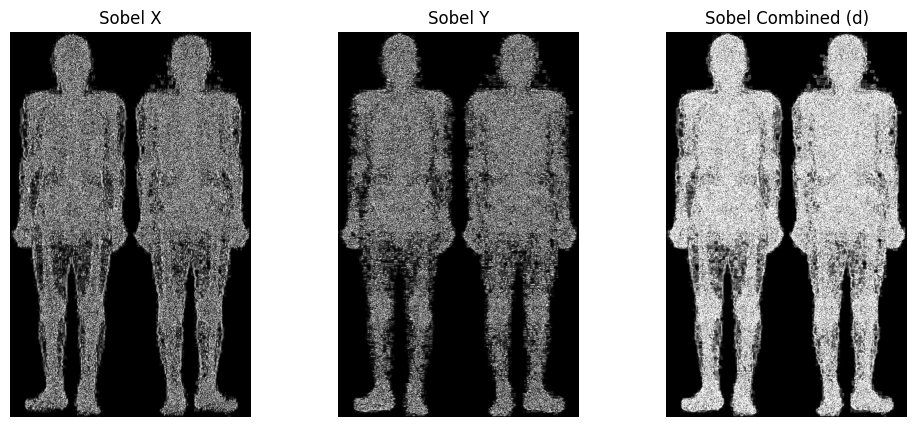

In [15]:
sobel_x = cv2.Sobel(a, cv2.CV_64F, 1, 0, ksize=5)
sobel_x = np.uint8(np.absolute(sobel_x))

sobel_y = cv2.Sobel(a, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = np.uint8(np.absolute(sobel_y))

d = cv2.add(sobel_x, sobel_y)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(d, cmap='gray')
plt.title("Sobel Combined (d)")
plt.axis("off")

plt.show()

In [16]:
# เอาผลลัพธ์ที่ดีที่สุด
sobel_x = cv2.Sobel(a, cv2.CV_64F, 1, 0, ksize=3)
sobel_x = np.uint8(np.absolute(sobel_x))

sobel_y = cv2.Sobel(a, cv2.CV_64F, 0, 1, ksize=3)
sobel_y = np.uint8(np.absolute(sobel_y))

d = cv2.add(sobel_x, sobel_y)

e = d (5x5 avg f.) 
ทำให้ภาพเนียนขึ้นและลด noise แต่จะทำให้ขอบไม่คมเท่าเดิม

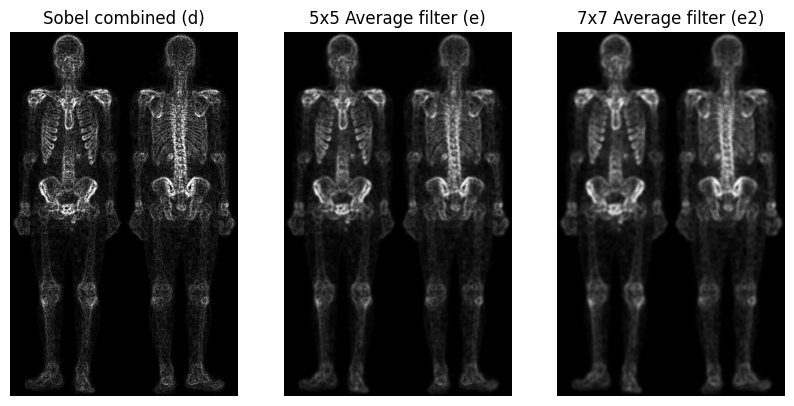

In [27]:
e = cv2.blur(d, (5,5))
e2 = cv2.blur(d, (7,7))

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(d, cmap='gray'), plt.title("Sobel combined (d)"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(e, cmap='gray'), plt.title("5x5 Average filter (e)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(e2, cmap='gray'), plt.title("7x7 Average filter (e2)"), plt.axis("off")
plt.show()

f = c * e

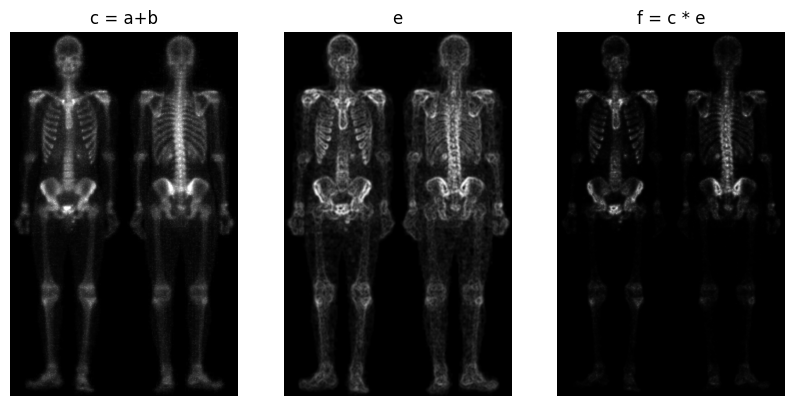

In [28]:
f = np.multiply(c.astype(np.float32), e.astype(np.float32))
f = cv2.normalize(f, None, 0, 255, cv2.NORM_MINMAX)  
f = np.uint8(f)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(c, cmap='gray'), plt.title("c = a+b"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(e, cmap='gray'), plt.title("e"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(f, cmap='gray'), plt.title("f = c * e"), plt.axis("off")
plt.show()

g=f+a

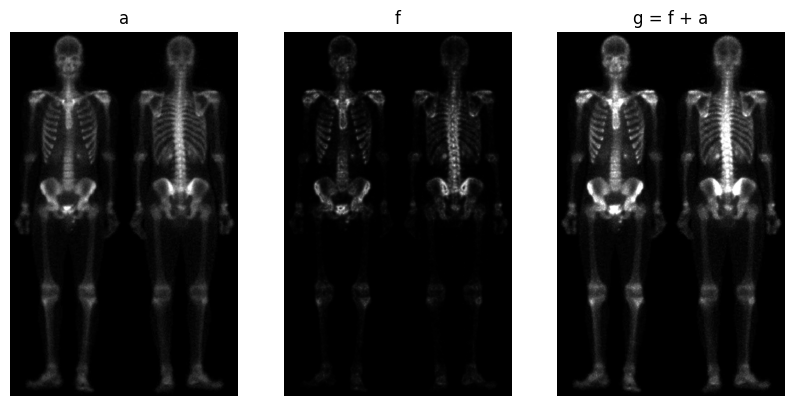

In [29]:
g = cv2.add(f, a)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(a, cmap='gray'), plt.title("a"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(f, cmap='gray'), plt.title("f"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(g, cmap='gray'), plt.title("g = f + a"), plt.axis("off")
plt.show()


หาค่าแกรมม่า

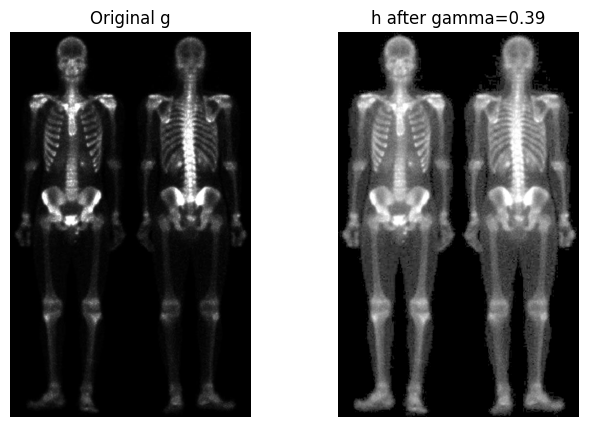

In [40]:
# แปลงเป็น float 0-1
g_norm = g.astype(np.float32) / 255.0

# หา point information จาก histogram
r_med = np.median(g_norm)  # median pixel
# r_mean = np.mean(g_norm)  # หรือใช้ mean แทน

# กำหนด target value
T = 0.2 # อยากให้ median = 0.7

# หา gamma
gamma = np.log(T) / np.log(r_med)

# ปรับ gamma
h = np.power(g_norm, gamma)
h = np.uint8(h * 255)

# แสดงผล
plt.figure(figsize=(12,5))
plt.subplot(1,3,1), plt.imshow(g, cmap='gray'), plt.title("Original g"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(h, cmap='gray'), plt.title(f"h after gamma={gamma:.2f}"), plt.axis("off")
plt.show()


เปรียบเทียบ a - h

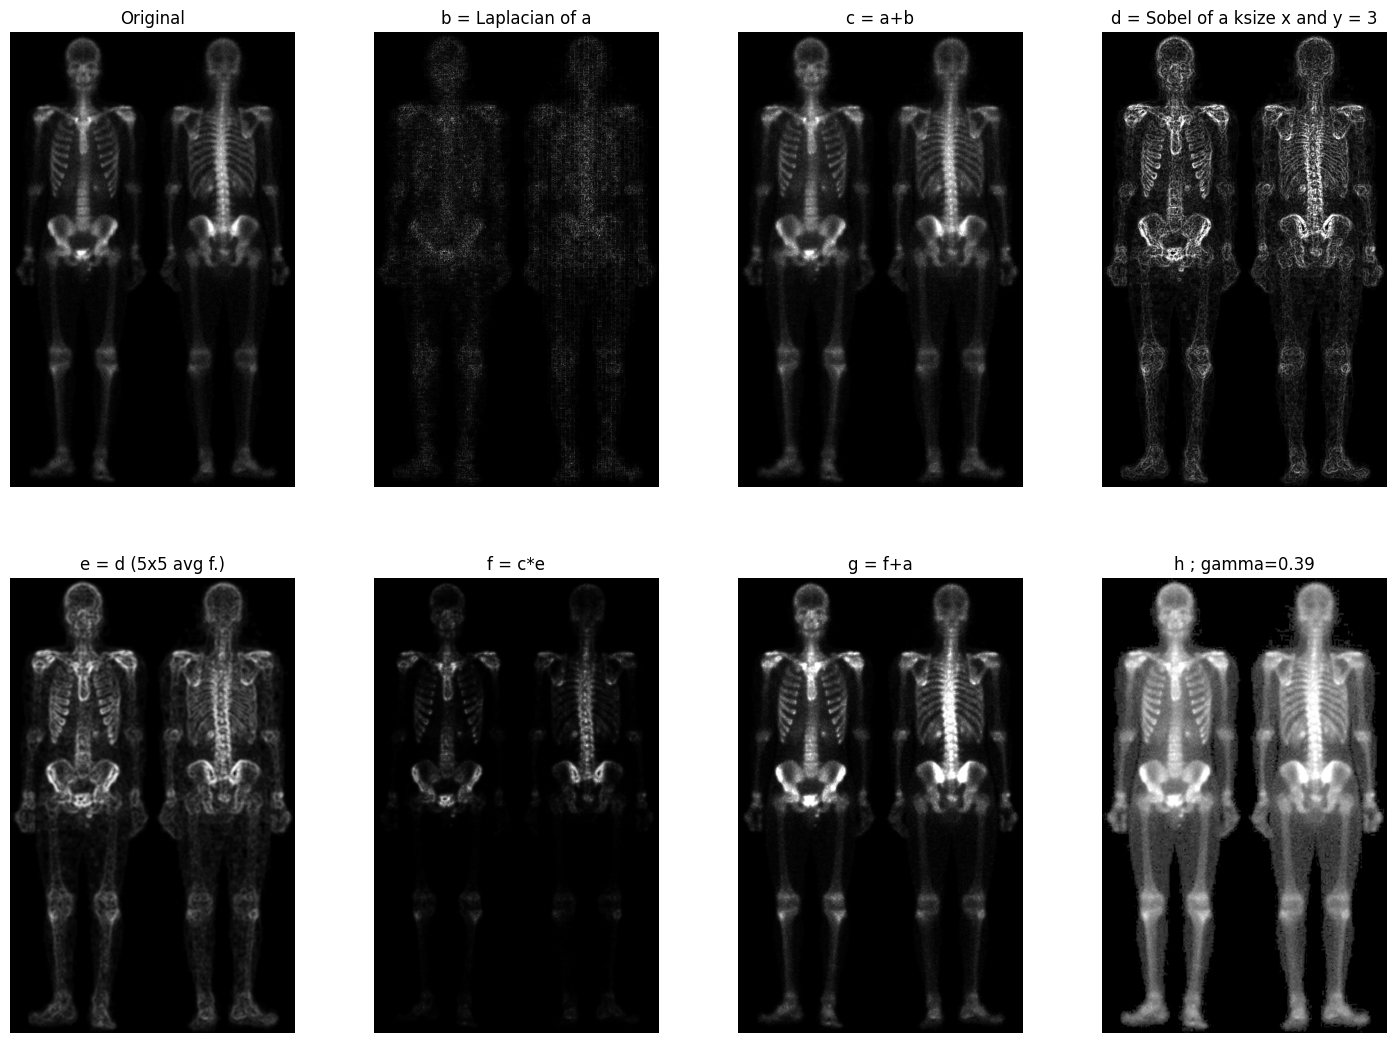

In [51]:
plt.figure(figsize=(18,13))
plt.subplot(2,4,1), plt.imshow(a, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(2,4,2), plt.imshow(b, cmap='gray'), plt.title("b = Laplacian of a"), plt.axis("off")
plt.subplot(2,4,3), plt.imshow(c, cmap='gray'), plt.title("c = a+b"), plt.axis("off")
plt.subplot(2,4,4), plt.imshow(d, cmap='gray'), plt.title("d = Sobel of a ksize x and y = 3"), plt.axis("off")
plt.subplot(2,4,5), plt.imshow(e, cmap='gray'), plt.title("e = d (5x5 avg f.)"), plt.axis("off")
plt.subplot(2,4,6), plt.imshow(f, cmap='gray'), plt.title("f = c*e"), plt.axis("off")
plt.subplot(2,4,7), plt.imshow(g, cmap='gray'), plt.title("g = f+a"), plt.axis("off")
plt.subplot(2,4,8), plt.imshow(h, cmap='gray'), plt.title(f"h ; gamma={gamma:.2f}"), plt.axis("off")
plt.show()